In [2]:
import numpy as np
from PIL import Image, ImageFilter, ImageDraw
import matplotlib.pyplot as plt

In [3]:
path = "data/lena.png"
img = Image.open(path)

ZADANIE 1

In [4]:
img_blurred = img.filter(ImageFilter.BLUR)
img_restored = img_blurred.filter(ImageFilter.SHARPEN)

arr = np.array(img_restored)
arr_restored = np.array(img_restored)

diff = np.abs(arr - arr_restored)
total = np.sum(diff)
print("Suma bezwzględnych różnic między oryginalnym a przywróconym obrazem:", total)

Suma bezwzględnych różnic między oryginalnym a przywróconym obrazem: 0


In [5]:
width, height = img.size
rows, cols = 7, 7
row_height = height // rows
col_width = width // cols

checkerboard = Image.new("RGB", (width, height))

counter = 0
for i in range(rows):
    for j in range(cols):
        block = (j*col_width, i*row_height, (j+1)*col_width, (i+1)*row_height)
        crop = img.crop(block)

        angle = (counter * 90) % 360
        rotated_crop = crop.rotate(angle)
        checkerboard.paste(rotated_crop, block)
        counter += 1

checkerboard.show()

ZADANIE 2

In [6]:
sigma = 1.0
kernel_size = 5
offset = kernel_size // 2
x, y = np.mgrid[-offset:offset+1, -offset:offset+1]
kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
kernel /= kernel.sum()

img_arr = np.array(img)
h, w, c = img_arr.shape
padded_img = np.pad(img_arr, ((offset, offset), (offset, offset), (0, 0)), mode='edge')
output_arr = np.zeros_like(img_arr)

for i in range(h):
    for j in range(w):
        for k in range(c):
            region = padded_img[i:i+kernel_size, j:j+kernel_size, k]
            output_arr[i, j, k] = np.sum(region * kernel)

img_blurred = Image.fromarray(output_arr)
img_blurred.show()

ZADANIE 3

Entropia oryginał:  7.7502
Entropia zaszyfrowany:    7.9998


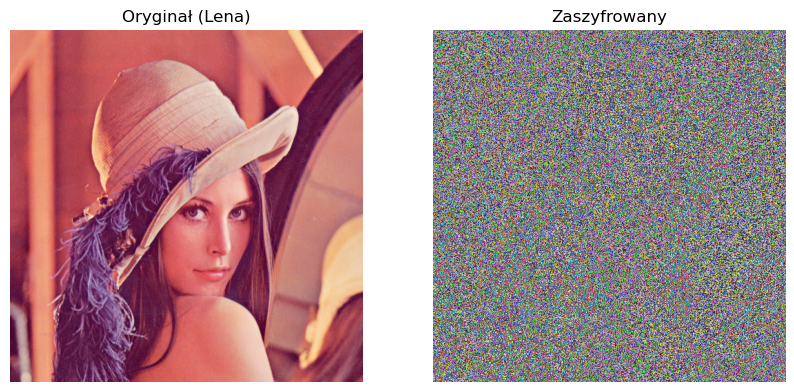

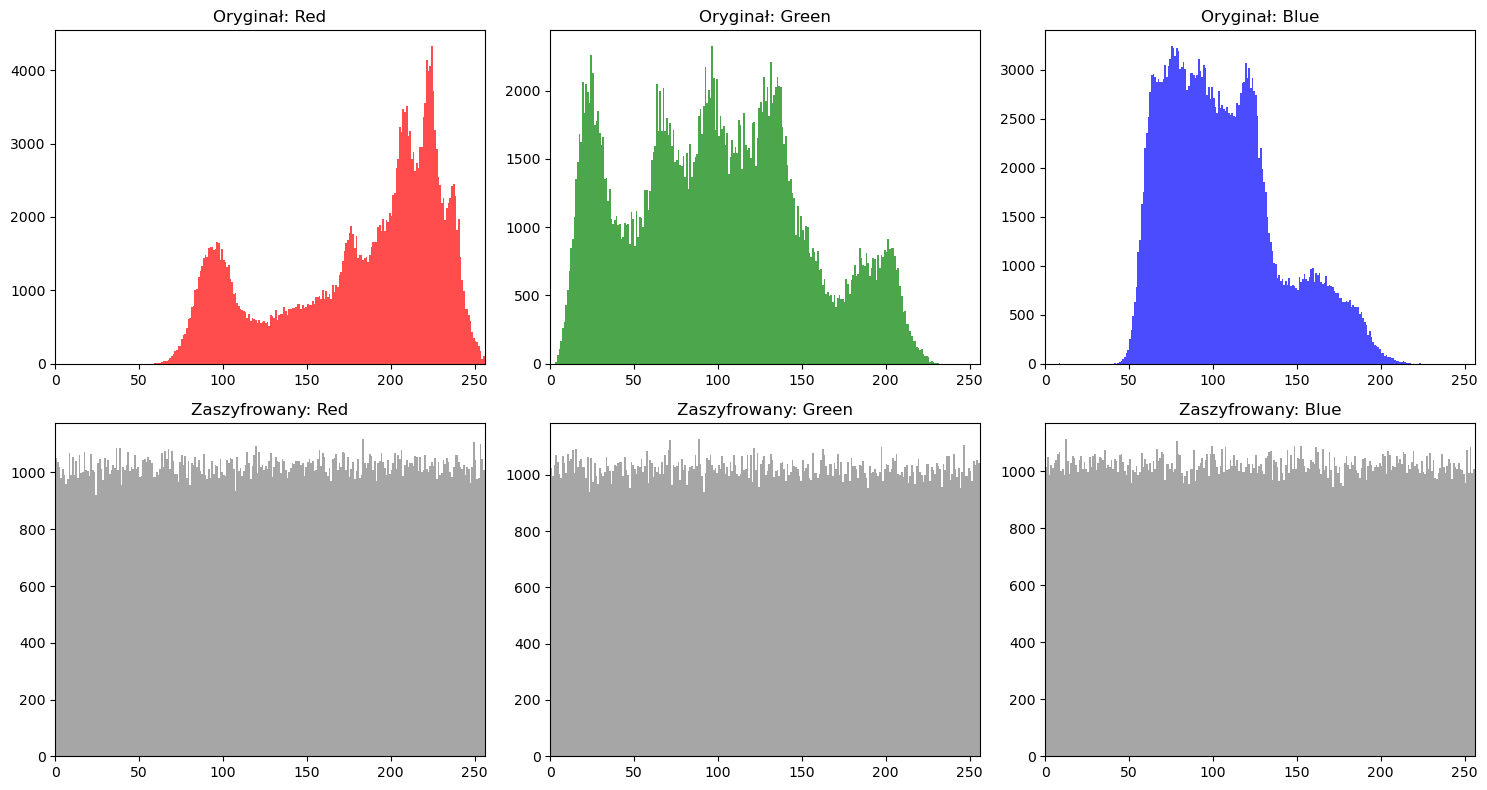

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def tent_map_generator(p, x0, n):
    sequence = np.empty(n, dtype=np.float64)
    x = x0

    inv_p = 1.0 / p
    inv_1_p = 1.0 / (1.0 - p)

    for i in range(n):
        if x < p:
            x = x * inv_p
        else:
            x = (1.0 - x) * inv_1_p
        sequence[i] = x
    return (sequence * 256).astype(np.uint8)

def calculate_entropy(img_array):
    flat_img = img_array.flatten()
    counts, _ = np.histogram(flat_img, bins=256, range=(0, 256))
    probs = counts / flat_img.size
    probs = probs[probs > 0]
    return -np.sum(probs * np.log2(probs))

def plot_histograms(orig, enc):
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))
    colors = ['r', 'g', 'b']
    titles = ['Red', 'Green', 'Blue']

    for i in range(3):
        axs[0, i].hist(orig[:,:,i].flatten(), bins=256, range=(0, 256), color=colors[i], alpha=0.7)
        axs[0, i].set_title(f'Oryginał: {titles[i]}')
        axs[0, i].set_xlim([0, 256])

    for i in range(3):
        axs[1, i].hist(enc[:,:,i].flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
        axs[1, i].set_title(f'Zaszyfrowany: {titles[i]}')
        axs[1, i].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

P_KEY = 0.456789
X0_KEY = 0.123456

filename = 'data/lena.png'

img = Image.open(filename).convert('RGB')

original_img = np.array(img)
HEIGHT, WIDTH, CHANNELS = original_img.shape

total_pixels = WIDTH * HEIGHT * CHANNELS
key_stream = tent_map_generator(P_KEY, X0_KEY, total_pixels)

key_reshaped = key_stream.reshape((HEIGHT, WIDTH, CHANNELS))

encrypted_img = (original_img.astype(np.uint16) + key_reshaped.astype(np.uint16)) % 256
encrypted_img = encrypted_img.astype(np.uint8)

entropy_orig = calculate_entropy(original_img)
entropy_enc = calculate_entropy(encrypted_img)

print(f"Entropia oryginał:  {entropy_orig:.4f}")
print(f"Entropia zaszyfrowany:    {entropy_enc:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(original_img)
ax1.set_title("Oryginał (Lena)")
ax1.axis('off')

ax2.imshow(encrypted_img)
ax2.set_title("Zaszyfrowany")
ax2.axis('off')

plt.show()

plot_histograms(original_img, encrypted_img)

ZADANIE 4

In [8]:
frames = []
bg_size = (400, 400)
square_size = 100
center = (bg_size[0]//2, bg_size[1]//2)

img_square = Image.new("RGBA", (square_size, square_size), (0, 0, 0, 0))
draw = ImageDraw.Draw(img_square)
draw.rectangle([0, 0, square_size, square_size], fill="purple")

for angle in range(0, 360, 10):
    frame  = Image.new("RGB", bg_size, "white")
    rotated_square = img_square.rotate(angle, expand=True)
    pasteX = center[0] - rotated_square.width // 2
    pasteY = center[1] - rotated_square.height // 2

    frame.paste(rotated_square, (pasteX, pasteY), rotated_square)
    frames.append(frame)

frames[0].save('rotating_square.gif', save_all=True, append_images=frames[1:], duration=50, loop=0)